In [1]:
from emoatlas import EmoScores
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pprint import pprint
from emoatlas.resources import _valences
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

from scipy import stats
import numpy as np

emos=EmoScores()

In [2]:
base_output_dir = "Valence_Metrics"
true_dir = "localdb"

captiondictionary={'climate':'Climate Change',
                       'gwarming':'Global warming',
                       'math': 'Math anxiety',
                       'misinformation_health': 'Misinformation in health'}

folders_of_interest = ['climate', 'math', 'misinformation_health','gwarming']
folders_of_interest = ['misinformation_health']

In [3]:
def extract_model(filename):
    match = re.search(r'_(.*?)_', filename)
    if match:
        return match.group(1)
    return None

def get_valence_sets(weighted_fmnt, language='english'):
    
    positive, negative, ambivalent = _valences(language)

    all_nodes = set(node for edge in weighted_fmnt for node in edge[:2])

    positive_nodes = all_nodes.intersection(positive)
    negative_nodes = all_nodes.intersection(negative)
    neutral_nodes = all_nodes - (positive_nodes | negative_nodes )

    return positive_nodes, negative_nodes, neutral_nodes

def get_true_scores(weighted_fmnt,language='english',get_percentage=True):    
    positive, negative, neutral = get_valence_sets(weighted_fmnt, language=language)


    def get_valence(word):
        if word in positive:
            return 'positive'
        elif word in negative:
            return 'negative'
        else:
            return 'neutral'
    
    # Weighted network analysis
    weights = {
        'pos_pos': 0 , 'neg_neg': 0, 'pos_neg': 0
                    }
        
    for node1, node2, weight in weighted_fmnt:
        valence1, valence2 = get_valence(node1), get_valence(node2)
    
        # Random distribution
        if valence1 == 'positive' and valence2 == 'positive':
            weights['pos_pos'] += 1
        elif valence1 == 'negative' and valence2 == 'negative':
            weights['neg_neg'] += 1
        elif (valence1 == 'negative' and valence2 == 'positive') or (valence1 == 'positive' and valence2 == 'negative'):
            weights['pos_neg'] += 1

    return weights

In [11]:
true_valence_scores= {}

for folder in folders_of_interest:
    true_folder_path = os.path.join(true_dir, folder)

    for filename in os.listdir(true_folder_path):
      true_path = os.path.join(true_folder_path, filename)
      with open(true_path, 'r') as file:

       fmnts=[]
       for line in file:
          data = json.loads(line)
          fmnts.append(data['fmnt']['syntactic'])

      
      w_fmnt = emos.combine_formamentis(fmnts,weights=True)
      
      print(filename)
      print(print(repr(filename)))

      if ('ITA') in filename:
         true_valence_scores[filename.rstrip('.jsonl')] = get_true_scores(w_fmnt,language='italian')
      else:
         true_valence_scores[filename.rstrip('.jsonl')] = get_true_scores(w_fmnt,language='english')

pprint(true_valence_scores)


GPT-3.5(ITA).jsonl
'GPT-3.5(ITA).jsonl'
None
GPT-3.5.jsonl
'GPT-3.5.jsonl'
None
GPT-4o(ITA).jsonl
'GPT-4o(ITA).jsonl'
None
GPT-4o.jsonl
'GPT-4o.jsonl'
None
Haiku(ITA).jsonl
'Haiku(ITA).jsonl'
None
Haiku.jsonl
'Haiku.jsonl'
None
LLaMAntino-2(ITA).jsonl
'LLaMAntino-2(ITA).jsonl'
None
Llama-3-8B.jsonl
'Llama-3-8B.jsonl'
None
Llama-3.1-70B(ITA).jsonl
'Llama-3.1-70B(ITA).jsonl'
None
Llama-3.1-70B.jsonl
'Llama-3.1-70B.jsonl'
None
Mistral-7b.jsonl
'Mistral-7b.jsonl'
None
{'GPT-3.5': {'neg_neg': 1058, 'pos_neg': 2326, 'pos_pos': 2051},
 'GPT-3.5(ITA)': {'neg_neg': 2008, 'pos_neg': 4566, 'pos_pos': 3625},
 'GPT-4': {'neg_neg': 2766, 'pos_neg': 6646, 'pos_pos': 6411},
 'GPT-4o(ITA)': {'neg_neg': 3688, 'pos_neg': 9809, 'pos_pos': 9110},
 'Haiku': {'neg_neg': 909, 'pos_neg': 2519, 'pos_pos': 3305},
 'Haiku(ITA)': {'neg_neg': 1580, 'pos_neg': 4289, 'pos_pos': 4187},
 'LLaMAntino-2(ITA)': {'neg_neg': 2164, 'pos_neg': 5322, 'pos_pos': 4495},
 'Llama-3-8B': {'neg_neg': 2030, 'pos_neg': 4120, 'pos_pos'

In [5]:
random_valence_scores={}

for folder in folders_of_interest:
    random_folder_path = os.path.join(base_output_dir, folder)

    for filename in os.listdir(random_folder_path):
        file_path = os.path.join(random_folder_path, filename)

        with open(file_path, 'r') as file:
            fmnts=[]
            for line in file:
                data = json.loads(line)
                fmnts.append((data['pos_pos'],data['pos_neg'],data['neg_neg']))
            random_valence_scores[filename.rstrip('_valences.jsonl')] = fmnts

pprint(random_valence_scores)


{'GPT-3.5': [(1251, 2470, 1193),
             (1799, 2911, 1159),
             (1468, 2511, 1026),
             (1064, 2520, 1412),
             (1403, 3069, 1656),
             (1400, 2373, 1014),
             (1267, 2855, 1708),
             (1242, 2304, 1070),
             (1639, 2621, 991),
             (989, 2326, 1280),
             (1221, 2394, 1113),
             (1434, 2553, 1177),
             (1455, 2826, 1349),
             (1542, 2843, 1329),
             (1282, 2248, 1021),
             (1407, 2771, 1293),
             (1440, 2548, 1098),
             (1480, 2816, 1302),
             (2075, 4004, 1912),
             (1759, 2196, 596),
             (1504, 2890, 1353),
             (1191, 2597, 1430),
             (1167, 2609, 1416),
             (1214, 2321, 1157),
             (1184, 2190, 1080),
             (1238, 2488, 1173),
             (1242, 2229, 1002),
             (1349, 2958, 1594),
             (1369, 2661, 1270),
             (1161, 2224, 1077),
             

In [6]:
def calculate_stats(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    # Calculate the standard error of the mean
    sem = std / np.sqrt(n)
    print(mean,std,n)
     # Z-value for 95% confidence
    z_value = 1.96
    # Calculate margin of error
    margin_of_error = z_value * (std / sqrt(n))

    # Calculate confidence interval
    ci = (mean - margin_of_error, mean + margin_of_error)
    # Calculate the confidence interval using the t-distribution
    ci = stats.t.interval(confidence=0.95, df=n-1, loc=mean,scale=sem)

    # Calculate the 2.5th and 97.5th percentiles for the confidence interval
    lower_bound = np.percentile(data, 2.5)
    upper_bound = np.percentile(data, 97.5)

    # Confidence interval based on percentiles
    ci = (lower_bound, upper_bound)
    print(ci)
    return mean, std, ci

# Calcola le statistiche per i valori casuali
random_stats = {}
for model in random_valence_scores:
    random_stats[model] = {
        'pos_pos': calculate_stats([t[0] for t in random_valence_scores[model]]),
        'pos_neg': calculate_stats([t[1] for t in random_valence_scores[model]]),
        'neg_neg': calculate_stats([t[2] for t in random_valence_scores[model]])
    }


2148.895 340.69200022016076 1000
(np.float64(1517.95), np.float64(2830.1749999999997))
5013.811 488.17203444504497 1000
(np.float64(4094.975), np.float64(6016.25))
2916.707 426.08371299720136 1000
(np.float64(2126.675), np.float64(3862.1))
1304.219 239.0296680774611 1000
(np.float64(903.8), np.float64(1790.0749999999998))
2955.957 330.2711252398053 1000
(np.float64(2350.775), np.float64(3621.025))
1671.258 283.45674301586325 1000
(np.float64(1160.95), np.float64(2276.05))
1596.035 283.1329547139383 1000
(np.float64(1084.975), np.float64(2188.075))
2913.666 340.69256209354774 1000
(np.float64(2259.9), np.float64(3614.1499999999996))
1323.065 246.72775149617516 1000
(np.float64(876.95), np.float64(1830.1999999999998))
1718.892 276.7697162115317 1000
(np.float64(1236.975), np.float64(2297.125))
3055.333 334.09621726890805 1000
(np.float64(2422.725), np.float64(3723.1749999999997))
1350.439 239.0121735353622 1000
(np.float64(932.95), np.float64(1843.3499999999997))
1313.015 255.60726485929

In [7]:
random_stats

{'Llama-3.1-70B': {'pos_pos': (np.float64(2148.895),
   np.float64(340.69200022016076),
   (np.float64(1517.95), np.float64(2830.1749999999997))),
  'pos_neg': (np.float64(5013.811),
   np.float64(488.17203444504497),
   (np.float64(4094.975), np.float64(6016.25))),
  'neg_neg': (np.float64(2916.707),
   np.float64(426.08371299720136),
   (np.float64(2126.675), np.float64(3862.1)))},
 'Mistral-7b': {'pos_pos': (np.float64(1304.219),
   np.float64(239.0296680774611),
   (np.float64(903.8), np.float64(1790.0749999999998))),
  'pos_neg': (np.float64(2955.957),
   np.float64(330.2711252398053),
   (np.float64(2350.775), np.float64(3621.025))),
  'neg_neg': (np.float64(1671.258),
   np.float64(283.45674301586325),
   (np.float64(1160.95), np.float64(2276.05)))},
 'Llama-3.1-70B(ITA)': {'pos_pos': (np.float64(1596.035),
   np.float64(283.1329547139383),
   (np.float64(1084.975), np.float64(2188.075))),
  'pos_neg': (np.float64(2913.666),
   np.float64(340.69256209354774),
   (np.float64(2259

In [8]:
def calculate_average_tuples(data):
    result = {}
    for model, tuples in data.items():
        sum_pos_pos = sum(t[0] for t in tuples)
        sum_pos_neg = sum(t[1] for t in tuples)
        sum_neg_neg = sum(t[2] for t in tuples)
        count = len(tuples)
        
        result[model] = {
            'pos_pos': round(sum_pos_pos / count),
            'pos_neg': round(sum_pos_neg / count),
            'neg_neg': round(sum_neg_neg / count)
        }
    
    return result

average_random_tuples = calculate_average_tuples(random_valence_scores)
pprint(average_random_tuples)


{'GPT-3.5': {'neg_neg': 1280, 'pos_neg': 2610, 'pos_pos': 1324},
 'GPT-3.5(ITA)': {'neg_neg': 1326, 'pos_neg': 2722, 'pos_pos': 1394},
 'GPT-4': {'neg_neg': 3437, 'pos_neg': 6550, 'pos_pos': 3111},
 'GPT-4o(ITA)': {'neg_neg': 2527, 'pos_neg': 4984, 'pos_pos': 2449},
 'Haiku': {'neg_neg': 1591, 'pos_neg': 3568, 'pos_pos': 1988},
 'Haiku(ITA)': {'neg_neg': 1350, 'pos_neg': 3055, 'pos_pos': 1719},
 'LLaMAntino-2(ITA)': {'neg_neg': 1343, 'pos_neg': 2663, 'pos_pos': 1313},
 'Llama-3-8B': {'neg_neg': 2449, 'pos_neg': 4482, 'pos_pos': 2041},
 'Llama-3.1-70B': {'neg_neg': 2917, 'pos_neg': 5014, 'pos_pos': 2149},
 'Llama-3.1-70B(ITA)': {'neg_neg': 1323, 'pos_neg': 2914, 'pos_pos': 1596},
 'Mistral-7b': {'neg_neg': 1671, 'pos_neg': 2956, 'pos_pos': 1304}}


In [9]:
model_order = ['GPT-3.5', 'GPT-3.5(ITA)','GPT-4o','GPT-4o(ITA)','Haiku', 'Haiku(ITA)', 'Llama-3-8B','Llama-3.1-70B','Llama-3.1-70B(ITA)', 'LLaMAntino-2(ITA)', 'Mistral-7b']


In [10]:
artificialdictionary={}

# Prepare the data for plotting
data = []
for model in model_order:
    for score_type in ['pos_pos', 'pos_neg', 'neg_neg']:
        true_score = true_valence_scores[model][score_type]
        random_mean, random_std, (ci_low, ci_high) = random_stats[model][score_type]
        data.append({
            'Model': model,
            'Score Type': f"{score_type}_true",
            'Score': round(true_score),
            'CI': None,
        })
        artificialdictionary[round(random_mean)]=round(random_mean-ci_low)
        data.append({
            'Model': model,
            'Score Type': f"{score_type}_random",
            'Score': round(random_mean),
            'CI': round(random_mean-ci_low),
        })

#data2 = []
#model_order = ['gpt-3.5', 'GPT-3.5(ITA)', 'Haiku', 'Haiku(ITA)', 'Llama-3-8B', 'LLaMAntino-2(ITA)', 'Mistral-7b']
#for model in model_order:
#    for score_type in ['pos_pos', 'pos_neg', 'neg_neg']:
#        data2.append({'Model': model, 'Score Type': f'{score_type}_true', 'Score': true_valence_scores[model][score_type]})
#        data2.append({'Model': model, 'Score Type': f'{score_type}_random', 'Score': average_random_tuples[model][score_type]})

display(data)
df = pd.DataFrame(data)

display(df)
#display(df2)

KeyError: 'GPT-4o'

AttributeError: 'ErrorbarContainer' object has no attribute 'patches'

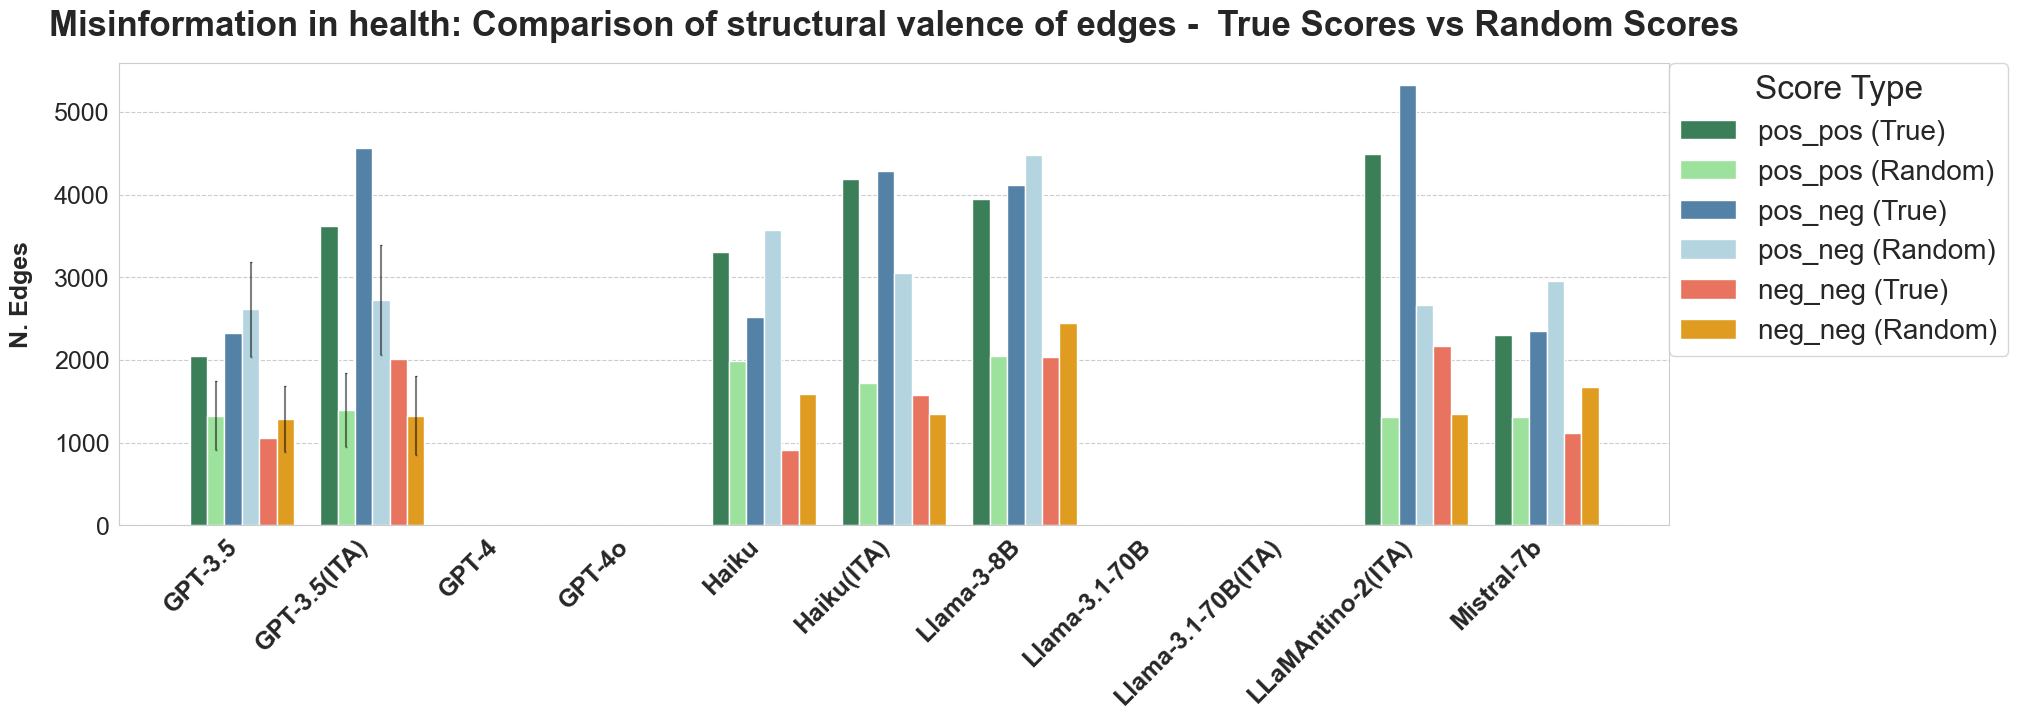

In [ ]:
# Set up the plot
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Create a custom color palette
colors = ['#2E8B57', '#90EE90', '#4682B4', '#ADD8E6', '#FF6347', '#FFA500']
palette = dict(zip(['pos_pos_true', 'pos_pos_random', 'pos_neg_true', 'pos_neg_random', 'neg_neg_true', 'neg_neg_random'], colors))

# Reorder the 'Score Type' column
order = ['pos_pos_true', 'pos_pos_random', 'pos_neg_true', 'pos_neg_random', 'neg_neg_true', 'neg_neg_random']
df['Score Type'] = pd.Categorical(df['Score Type'], categories=order, ordered=True)
df = df.sort_values(['Model', 'Score Type'])

# Set the order of the models
df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)

# Create the grouped barplot
ax = sns.barplot(x='Model', y='Score', hue='Score Type', data=df, palette=palette, hue_order=order, order=model_order,
                 errcolor='black', capsize=0.05)  # Add errcolor and capsize parameters

# Customize the plot
plt.title(f'{captiondictionary[folders_of_interest[0]]}: Comparison of structural valence of edges -  True Scores vs Random Scores', fontsize=25, fontweight='bold', pad=20)
plt.xlabel(' ', fontsize=1, fontweight='bold', labelpad=1)
plt.ylabel('N. Edges', fontsize=18, fontweight='bold', labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=18, fontweight='bold')
plt.yticks(fontsize=18)

# Modify legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['pos_pos (True)', 'pos_pos (Random)', 'pos_neg (True)', 
              'pos_neg (Random)', 'neg_neg (True)', 'neg_neg (Random)']
plt.legend(handles, new_labels, title='Score Type', title_fontsize='24', fontsize='20', 
           bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)


for container in ax.containers:
    for i, patch in enumerate(container.patches):
            if round(patch.get_height()) in artificialdictionary:
                ax.errorbar(x=patch.get_x()+patch.get_width()/2, 
                    y=patch.get_height(),
                    yerr= artificialdictionary[patch.get_height()], fmt='none', ecolor='black', capsize=1, capthick=1,alpha=0.5)

#Add value labels on top of the bars
#for container in ax.containers:
#    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, fontweight='bold', padding=2)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Z scores

In [ ]:

def compute_z_scores(distribution, true_values):
    z_scores = {}
    for key in true_values.keys():
        mean = np.mean([item[key] for item in distribution])
        std = np.std([item[key] for item in distribution])
        z_scores[key] = (true_values[key] - mean) / std
    return z_scores


In [ ]:
for folder in folders_of_interest:
    input_folder_path = os.path.join(base_output_dir, folder)
    true_folder_path = os.path.join(true_dir, folder)

    for filename in os.listdir(input_folder_path):

            file_path = os.path.join(input_folder_path, filename)

            true_path = os.path.join(true_folder_path, (filename.rstrip('_valence.jsonl')+'.jsonl'))

            # get the true values
            with open(true_path, 'r') as file:

                fmnts=[]
                for line in file:
                    data = json.loads(line)
                    fmnts.append(data['fmnt']['syntactic'])
            
            w_fmnt=emos.combine_edgelists(fmnts)

            if ('ITA') in filename:
                truescores= get_true_scores(w_fmnt,language='italian',get_percentage=True)
            else:
                truescores= get_true_scores(w_fmnt,language='english',get_percentage=True)

            results = []
            with open(file_path, 'r') as file:
                for line in file:
                    data = json.loads(line)
                    total = data['pos_pos'] + data['pos_neg'] + data['neg_neg']
                    results.append({
                        'pos_pos_pct': data['pos_pos'] / total * 100,
                        'pos_neg_pct': data['pos_neg'] / total * 100,
                        'neg_neg_pct': data['neg_neg'] / total * 100
                    })
            

            # Calculate the mean of the random distributions
            random_scores ={
            'mean_pos_pos_pct' : np.mean([item['pos_pos_pct'] for item in results]),
            'mean_pos_neg_pct' : np.mean([item['pos_neg_pct'] for item in results]),
            'mean_neg_neg_pct' : np.mean([item['neg_neg_pct'] for item in results])
            }
           

            
            z_scores = compute_z_scores(results,truescores)
            print(filename.rstrip('_valence.jsonl'))
            print('percentage of true scores: ',truescores)
            print('average percentage of random scores:',random_scores)
            print('zscores: ', z_scores)
            print('=====================')


